# Linear Regression

🎯 In this exercise, you will model the sale price of houses (`SalePrice`) according to their living areas (`GrLivArea`) 

👇 Load the `ML_Houses_dataset.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [1]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

houses = pd.read_csv('../data/houses.csv')
houses.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
from sklearn.linear_model import LinearRegression

ℹ️ You can download a detailed description of the dataset [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

## 1. Define the feature set and target

🎯 The objective is to model the sale price of houses in \$ (`SalePrice`) according to their living areas in $ft^2$ (`GrLivArea`).

👇 Assign those two variables to X and y. Remember that X is the feature(s), and y the target.

In [3]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
df = houses[['GrLivArea', 'SalePrice']]
X = df[['GrLivArea']]
y = df['SalePrice']

model.fit(X, y)

LinearRegression()

👇 In a scatter plot ([doc](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)), visualize the relationship between the living areas and the sale prices.

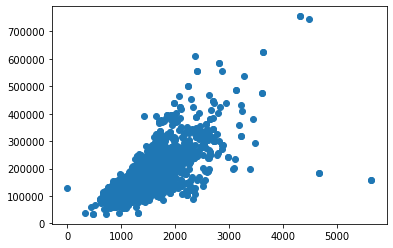

In [4]:
# YOUR CODE HERE
plt.scatter(X, y);

ℹ️ The scatter plot should hint at the somewhat linear relationship.

### ☑️ Test your code

In [5]:
from nbresult import ChallengeResult

result = ChallengeResult('variables',
                         variable_X = round(X.mean()).item(),
                         variable_y = round(y.mean())
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_variables.py::TestVariables::test_variable_X PASSED           [ 50%]
tests/test_variables.py::TestVariables::test_variable_y PASSED           [100%]

============================== 2 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/variables.pickle

git commit -m 'Completed variables step'

git push origin master


## 2. Cross-validation

👇 Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)), run a 5-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting sale price from living area. Save the raw output of the cross validation under a new variable `cv_results`.

In [6]:
# YOUR CODE HERE
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, X, y, cv=5)

❓ What is the lowest score of the cross validation? Compute your answer and save the value under new variable `min_score`.

In [18]:
# YOUR CODE HERE
min_score = cv_results['test_score'].min()

❓ What is the highest score of the cross validation?  Compute your answer and save the value under new variable `max_score`.

In [19]:
# YOUR CODE HERE
max_score = cv_results['test_score'].max()

❓ What is the mean score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [20]:
# YOUR CODE HERE
mean_score = cv_results['test_score'].mean()

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

In [32]:
cv_results['test_score']

array([ 0.4970248 ,  0.57976872,  0.57529704,  0.56142978,  0.48568525,
        0.64884152,  0.46625164,  0.55720809,  0.58265545,  0.6084374 ,
        0.40887764,  0.29414547,  0.69162681,  0.65441359,  0.36327528,
        0.56333421,  0.48568497,  0.59415993,  0.56495557,  0.54332523,
        0.29907295,  0.51861401,  0.4913978 ,  0.50588597,  0.19829409,
        0.6415878 ,  0.64689504,  0.14240605,  0.37771166, -0.79123084,
        0.49619032,  0.3984856 ,  0.47848253,  0.52697364,  0.57204761,
        0.73003867,  0.52258507,  0.50965852,  0.4358343 , -0.1557362 ])

### ☑️ Test your code

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('cv_results',
                         cv_result = cv_results,
                         min_score = min_score,
                         max_score = max_score,
                         mean_score = mean_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-3.4.0
collecting ... collected 4 items

tests/test_cv_results.py::TestCvResults::test_cv_max PASSED              [ 25%]
tests/test_cv_results.py::TestCvResults::test_cv_mean PASSED             [ 50%]
tests/test_cv_results.py::TestCvResults::test_cv_min PASSED              [ 75%]
tests/test_cv_results.py::TestCvResults::test_cv_results PASSED          [100%]

============================== 4 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master


👇 Plot the evolution of
- the **total computational time** (fitting time + scoring time)
- and the **average score** of the K folds...

as K folds increases from 2 until 40.

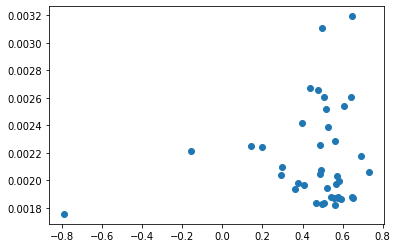

In [33]:
# YOUR CODE HERE
cv_results = {}
for i in np.arange(2,41,1):
    cv_results.update(cross_validate(model, X, y, cv=i))
    
    
plt.scatter(cv_results['test_score'], cv_results['fit_time'] );

In [13]:
# YOUR CODE HERE

ℹ️ You will notice that while the score stabilizes, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the model

Cross validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation. 

👇 Go ahead and train the model. Save the trained model under the variable `model`.

In [14]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X = df[['GrLivArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model1 = LinearRegression()
model = model1.fit(X_train, y_train)

model.fit(X,y)

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under variable name `slope`.

In [34]:
# YOUR CODE HERE
slope = model.coef_

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under variable name `intercept`.

In [35]:
# YOUR CODE HERE
intercept = model.intercept_

### ☑️ Test your code

In [36]:
from nbresult import ChallengeResult

result = ChallengeResult('trained_model',
                         model = model,
                         slope = slope,
                         intercept = intercept
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_trained_model.py::TestTrainedModel::test_intercept PASSED     [ 50%]
tests/test_trained_model.py::TestTrainedModel::test_slope PASSED         [100%]

============================== 2 passed in 0.65s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master


## 4. Visualize the model

👇 With matplotlib: 
- Define the line of best fit equation (using the slope and intercept values)
- Plot it in a graph over the scattered data points

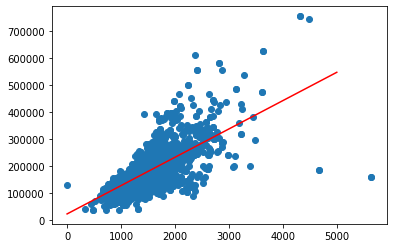

In [37]:
# YOUR CODE HERE
a = np.arange(0, 6000, 1000)
b = [i*slope + intercept for i in a]

plt.scatter(df['GrLivArea'], df['SalePrice']);
plt.plot(a, b, c='red');

# 5. Predict

👇 Use your trained model to predict the sale price of a house with a living area of 1500 square feet. Save the predicted price as variable name `prediction`.

In [39]:
# YOUR CODE HERE
prediction = model.predict([[1500]])
prediction

/home/bitazaratustra/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([179618.0344634])

### ☑️ Test your code

In [20]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_prediction.py::TestPrediction::test_prediction PASSED         [100%]

============================== 1 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master


# 🏁